Este material tiene contribuciones de Telefónica, Ángel Luis Jiménez Amor y Carlos Figuera.

# Imports

In [1]:
import numpy as np
import pandas as pd
import io, os
import random
import itertools
import matplotlib.colors as mcolors


from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx
from networkx.algorithms import community

# Functions

In [3]:
def draw_graph(
    g, 
    node_size=200, 
    figsize=(5,5),
    node_color=None,
    edge_label_att=None,
    node_label='id',
    edge_width = 0.5
):
    
    plt.figure(1,figsize=figsize) 

    pos = nx.spring_layout(g)  # positions for all nodes
    plt.figure(1,figsize=(6,6)) 

    # nodes
    if node_color == None:
        nx.draw_networkx_nodes(
            g, 
            pos, 
            node_size=node_size,
            cmap=plt.cm.plasma
        )
        
    else:
        if type(node_color)==dict:
            nx.draw_networkx_nodes(
                g, 
                pos, 
                node_size=node_size, 
                node_color=list(node_color.values()),
                cmap=plt.cm.plasma
            )
            
        else:
            nx.draw_networkx_nodes(
                g, 
                pos, 
                node_size=node_size, 
                node_color=node_color,
                cmap=plt.cm.plasma
            )

    #labels
    if node_label=='id':
        nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')
        
    # edges
    nx.draw_networkx_edges(g, pos, width=edge_width)
    
    # edge-labels
    if edge_label_att != None:
        nx.draw_networkx_edge_labels(
            g, 
            pos, 
            edge_labels=nx.get_edge_attributes(g,edge_label_att), 
            font_size=16
        )

    plt.axis('off')
    plt.show()

# Documentation

* Distances
* Network cohesion

En este notebook vamos ver los estudios y estadísticas descriptivas que nos permitirán conocer un grafo

El conjunto de datos con el que vamos a trabajar puede obtenerse del siguiente [link](https://hog.grinvin.org/ViewGraphInfo.action?id=30664)

# Read Data

In [4]:
G0 = nx.read_graph6("data/samples/graph_27839.g6")
G1 = nx.read_graph6("data/samples/graph_27532.g6")
G2 = nx.read_graph6("data/samples/graph_27534.g6")
G3 = nx.read_graph6("data/samples/graph_27839.g6")
G4 = nx.read_graph6("data/samples/graph_30679.g6")
G5 = nx.read_graph6("data/samples/graph_30664.g6")

In [6]:
# Generamos un grafo G con pesos
G_weighted = nx.Graph()

G_weighted.add_edge('a', 'b', weight=0.6)
G_weighted.add_edge('a', 'c', weight=0.9)
G_weighted.add_edge('c', 'd', weight=0.1)
G_weighted.add_edge('c', 'e', weight=0.7)
G_weighted.add_edge('c', 'f', weight=0.5)
G_weighted.add_edge('a', 'd', weight=0.3)
G_weighted.add_edge('b', 'g', weight=0.8)
G_weighted.add_edge('g', 'h', weight=0.5)
G_weighted.add_edge('h', 'd', weight=0.3)

In [8]:
# y otro grafo dirigido
G_directed = nx.read_edgelist("data/ia-southernwomen.edges",
                              create_using=nx.DiGraph())

También utilizaremos otros grafos populares.

**Zachary's karate club**: A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split [extracted from Wikipedia].

El grafo de Zachary’s Karate Club está integrado directamente en Networkx. También se puede descargar de:

http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

In [9]:
G_karate = nx.karate_club_graph()

**French political blogs graph**: muestra de 1.100 blogs franceses un día de Octubre de 2006, clasificados según su afiliación politica. Las aristas muestran referencias entre blogs. 192 blogs y 1.431 enlaces.

In [10]:
G_fblog = nx.read_graphml('data/fblog.graphml')

# Visualizations

/home/miguelangel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


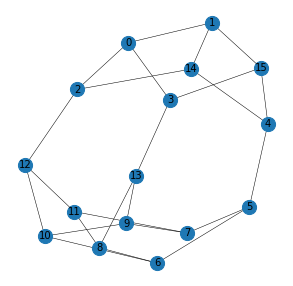

In [11]:
draw_graph(G0)

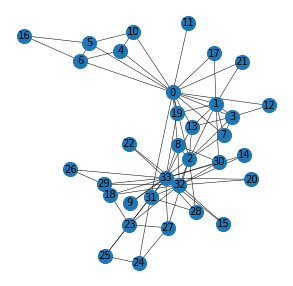

In [12]:
draw_graph(G_karate)

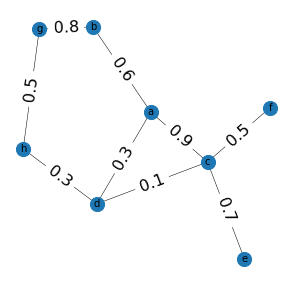

In [13]:
draw_graph(G_weighted, edge_label_att='weight')

/home/miguelangel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


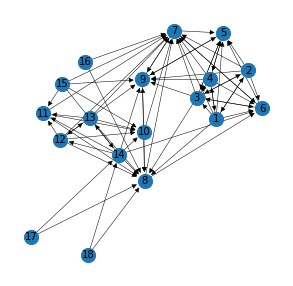

In [14]:
draw_graph(G_directed)

# Analysis

## Distances

https://networkx.github.io/documentation/stable/reference/algorithms/distance_measures.html En este enlace se encuentra la documentación de la librería refernte a las medidas de distancia en una red.

La distancia entre dos vértices v y w en un grafo, es expresada en términos de la longitud del camino más corto entre v y w o la $vw$-geodésica.

### 1. Distancia entre nodos

In [15]:
nx.algorithms.shortest_path_length(G_weighted, 'b', 'f')

3

In [16]:
nx.algorithms.shortest_path(G_weighted, 'b', 'f')

['b', 'a', 'c', 'f']

In [17]:
nx.algorithms.shortest_path(G_weighted, 'b', 'f', weight='weight')

['b', 'a', 'd', 'c', 'f']

In [18]:
# P1
nx.algorithms.shortest_path_length(G_directed, '17', '5')

3

### 2. Diámetro

El **diámetro** es la mayor distancia entre dos vértice de un grafo conectado.

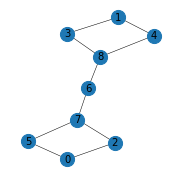

In [19]:
draw_graph(G4, figsize=(3,3))

In [20]:
nx.distance_measures.diameter(G4)

6

In [21]:
# con una red algo más compleja:
party = nx.get_node_attributes(G_fblog, 'PolParty')
parties = list(np.unique(list(party.values())))

colors = []
for k in party.keys():
    colors.append(parties.index(party[k]))

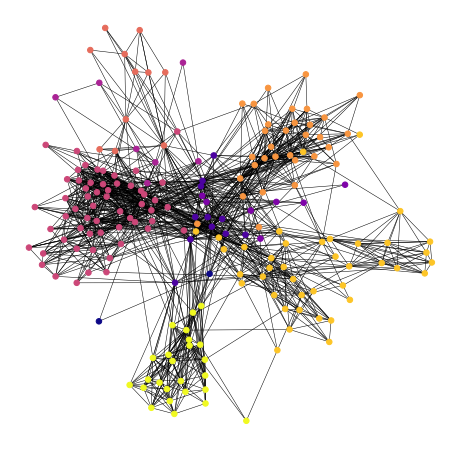

In [22]:
draw_graph(G_fblog, figsize=(8,8), node_size=30, node_color=colors, node_label='')

In [23]:
nx.distance_measures.diameter(G_fblog)

5

### 3. Excentricidad

La **excentrididad** de un nodo, es la máxima distancia desde ese nodo a cualquier otro de la red. De esta manera, nos puede informar cómo de lejos está el vértice más alejado de un vértice dado.

https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.eccentricity.html?highlight=eccentricity#networkx-algorithms-distance-measures-eccentricity

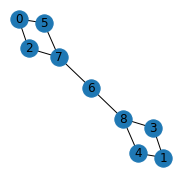

In [24]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
nx.draw(G4,with_labels=True,ax=ax)

In [25]:
nx.algorithms.distance_measures.eccentricity(G4)

{0: 6, 1: 6, 2: 5, 3: 5, 4: 5, 5: 5, 6: 3, 7: 4, 8: 4}

In [26]:
# Con el grafo de partidos políticos:
e = list(nx.algorithms.distance_measures.eccentricity(G_fblog).values())
e = list(0.03*(np.array(e)**6))

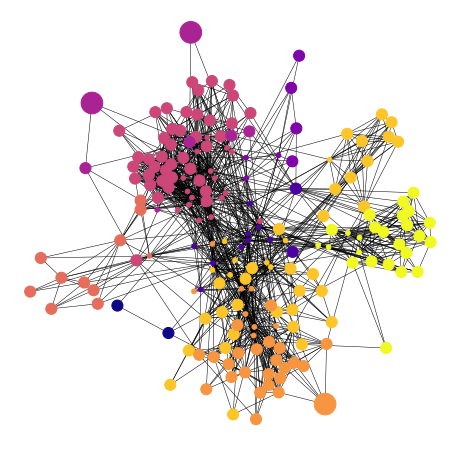

In [27]:
draw_graph(G_fblog, node_color=colors, figsize=(8,8), node_size=e, node_label='')

In [29]:
nx.algorithms.distance_measures.eccentricity(G_fblog)

{'n0': 4,
 'n1': 3,
 'n2': 4,
 'n3': 3,
 'n4': 3,
 'n5': 4,
 'n6': 4,
 'n7': 4,
 'n8': 4,
 'n9': 4,
 'n10': 4,
 'n11': 3,
 'n12': 3,
 'n13': 4,
 'n14': 4,
 'n15': 4,
 'n16': 3,
 'n17': 4,
 'n18': 4,
 'n19': 4,
 'n20': 4,
 'n21': 3,
 'n22': 3,
 'n23': 3,
 'n24': 4,
 'n25': 3,
 'n26': 4,
 'n27': 4,
 'n28': 4,
 'n29': 4,
 'n30': 4,
 'n31': 4,
 'n32': 4,
 'n33': 4,
 'n34': 4,
 'n35': 4,
 'n36': 4,
 'n37': 4,
 'n38': 4,
 'n39': 4,
 'n40': 4,
 'n41': 4,
 'n42': 4,
 'n43': 4,
 'n44': 4,
 'n45': 3,
 'n46': 3,
 'n47': 4,
 'n48': 3,
 'n49': 4,
 'n50': 3,
 'n51': 4,
 'n52': 4,
 'n53': 4,
 'n54': 4,
 'n55': 4,
 'n56': 4,
 'n57': 3,
 'n58': 3,
 'n59': 3,
 'n60': 4,
 'n61': 4,
 'n62': 5,
 'n63': 3,
 'n64': 4,
 'n65': 4,
 'n66': 4,
 'n67': 4,
 'n68': 4,
 'n69': 4,
 'n70': 4,
 'n71': 3,
 'n72': 4,
 'n73': 4,
 'n74': 4,
 'n75': 4,
 'n76': 4,
 'n77': 4,
 'n78': 4,
 'n79': 4,
 'n80': 4,
 'n81': 3,
 'n82': 3,
 'n83': 4,
 'n84': 4,
 'n85': 4,
 'n86': 4,
 'n87': 4,
 'n88': 4,
 'n89': 4,
 'n90': 4,
 'n91': 4

### 4. Radio

El **radio** es la mínima excentricidad

In [30]:
nx.algorithms.distance_measures.radius(G_fblog)

3

In [31]:
nx.algorithms.distance_measures.radius(G_karate)

3

### 5. Centro

Aquellos nodos cuya excentricidad es igual al radio de la red, se denominan centros

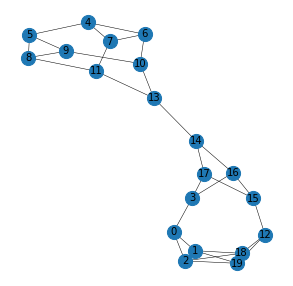

In [32]:
draw_graph(G1)

In [33]:
nx.algorithms.distance_measures.center(G1)

[14]

En el siguiente caso se aprecia la importancia de la representacion (layout)

In [34]:
pos = nx.layout.circular_layout(G4)

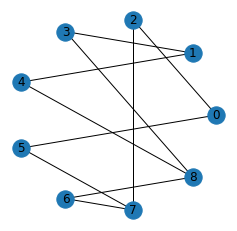

In [35]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
nx.draw(G4, pos=pos, with_labels=True,ax=ax)

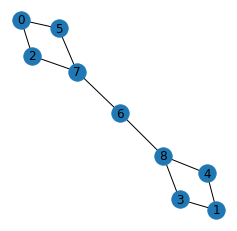

In [36]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
nx.draw(G4, with_labels=True,ax=ax)

In [37]:
nx.algorithms.distance_measures.center(G4)

[6]

Ahora con una red más compleja:

In [38]:
centros = nx.algorithms.distance_measures.center(G_karate)

In [39]:
club = nx.get_node_attributes(G_karate, 'club')
club_list = list(np.unique(list(club.values())))

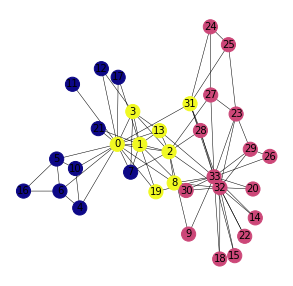

In [40]:
colors = []
for k in club.keys():
    colors.append(club_list.index(club[k]))

for n in range(len(centros)):
    colors[centros[n]] = 2

draw_graph(G_karate, node_color=colors) 

## Cohesión del Grafo

### 1. Definiciones

#### Clique

Un clique es un subgrafo completo, es decir un subconjunto de un grafo (un subgrafo) en el que los nodos están más cercanos e intensos entre sí, que con el resto de la red.

https://networkx.github.io/documentation/stable/reference/algorithms/clique.html

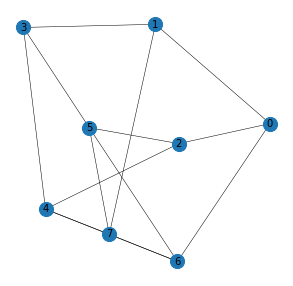

In [41]:
draw_graph(G5)

El *clique number* de un grafo es el máximo clique que se puede encontrar entre sus nodos

In [42]:
nx.algorithms.clique.graph_clique_number(G5)

3

Cada nodo puede estar en 1 o más cliques

In [43]:
nx.algorithms.clique.number_of_cliques(G5)

{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3}

Se puede analizar cada clique por separado (nx.algorithms.clique.enumerate_all_cliques)

In [44]:
list(nx.algorithms.clique.enumerate_all_cliques(G5))

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [0, 1],
 [0, 2],
 [0, 6],
 [1, 3],
 [1, 7],
 [2, 4],
 [2, 5],
 [3, 4],
 [3, 5],
 [4, 6],
 [4, 7],
 [5, 6],
 [5, 7],
 [6, 7],
 [4, 6, 7],
 [5, 6, 7]]

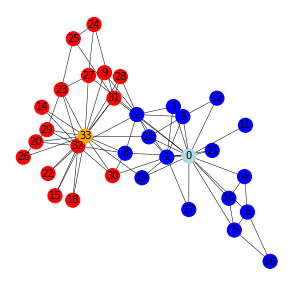

In [45]:
n_nodos = len(G_karate)
colors = []
sizes = []
for n in range(n_nodos):
    if G_karate.node[n]['club']=='Mr. Hi':
        color = 'blue'
    else:
        color = 'red'
    if (n==0):
        color = 'lightblue'
    if (n==33):
        color = 'orange'
    colors.append(color)

draw_graph(G_karate, node_color=colors)

In [46]:
nx.algorithms.clique.graph_clique_number(G_karate)

5

In [47]:
np.unique( [len(x) for x in list(nx.algorithms.clique.enumerate_all_cliques(G_karate))], return_counts=True)

(array([1, 2, 3, 4, 5]), array([34, 78, 45, 11,  2]))

#### k-cores

Un k-core de un grafo G es una subgrafo de G para el que todos los nodos tienen al menos grado k, y tal que no hay otro subgrafo contenido en él cumpliendo dicha propiedad (es máximo en esa propiedad).

In [48]:
core_number = nx.algorithms.core_number(G_karate)

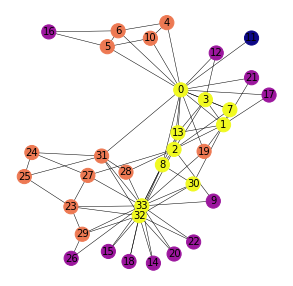

In [49]:
draw_graph(G_karate, node_color=core_number)

#### Diadas, Triadas

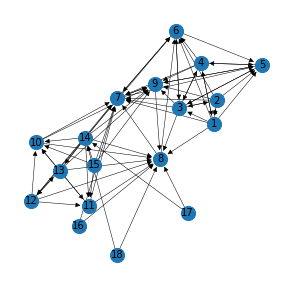

In [50]:
# Dibujamos G_directed
draw_graph(G_directed)

In [51]:
# Extraemos el censo de triadas con triadic_census
nx.algorithms.triadic_census(G_directed)

{'003': 180,
 '012': 263,
 '102': 82,
 '021D': 13,
 '021U': 100,
 '021C': 48,
 '111D': 20,
 '111U': 10,
 '030T': 52,
 '030C': 0,
 '201': 3,
 '120D': 14,
 '120U': 14,
 '120C': 5,
 '210': 11,
 '300': 1}

In [52]:
#: Dictionary mapping triad name to list of directed edges in the
#: digraph representation of that triad (with nodes 'a', 'b', and 'c').
TRIAD_EDGES = {'003': [],
               '012': ['ab'],
               '102': ['ab', 'ba'],
               '021D': ['ba', 'bc'],
               '021U': ['ab', 'cb'],
               '021C': ['ab', 'bc'],
               '111D': ['ac', 'ca', 'bc'],
               '111U': ['ac', 'ca', 'cb'],
               '030T': ['ab', 'cb', 'ac'],
               '030C': ['ba', 'cb', 'ac'],
               '201': ['ab', 'ba', 'ac', 'ca'],
               '120D': ['bc', 'ba', 'ac', 'ca'],
               '120U': ['ab', 'cb', 'ac', 'ca'],
               '120C': ['ab', 'bc', 'ac', 'ca'],
               '210': ['ab', 'bc', 'cb', 'ac', 'ca'],
               '300': ['ab', 'ba', 'bc', 'cb', 'ac', 'ca']
               }

### 2. Densidad

La densidad de un grafo es la frecuenca de las aristas existentes en relación a todas las posibles aristas que podría haber entre los nodos.

In [53]:
nx.density(G_karate)

0.13903743315508021

El concepto se puede aplicar a todo el grafo, un subgrafo en particular, o incluso la vecindad de un nodo. En el caso de uno de los hubs de la red de karate:

In [54]:
# Crear ego-grafo (nx.ego_graph) de los nodos hub (nodos 0 y 33) y ver densidad local
ego0 = nx.ego_graph(G_karate,0)
ego33 = nx.ego_graph(G_karate,33)
nx.density(ego0)

0.25

#### El coeficiente de clustering

$$c|_T(G)=\frac{3τ{\Delta}(G)}{τ3(G)}$$

mide la fracción de tripletas de nodos que se cierran en triángulos (como de frecuentemente dos nodos a y b conectados a un nodo c están unidos entre sí).

In [55]:
G = nx.complete_graph(5)
print(nx.transitivity(G))

1.0


In [56]:
# Ahora con la red de karate
nx.transitivity(G_karate)

0.2556818181818182

Otra medida relacionada, única para grafos dirigidos, es la **reciprocidad** (nx.reciprocity), que mide la fracción de aristas que son mutuas.

In [57]:
# Reciprocidad grafo karate
nx.reciprocity(G_karate)

0.0

In [58]:
# Reciprocidad grafo dirigido (G_directed)
nx.reciprocity(G_directed)

0.24719101123595505

### Conectividad

+ Componente fuertemente conexo: Un grafo dirigido donde existe un camino desde cualquier vértice a cualquier otro vértice
+ Componente debilmente conexo: El subgrafo no dirigido que es conexo.

https://networkx.github.io/documentation/stable/reference/algorithms/connectivity.html

In [59]:
G_con = G_weighted.copy()
G_con.add_edge('j', 'k')

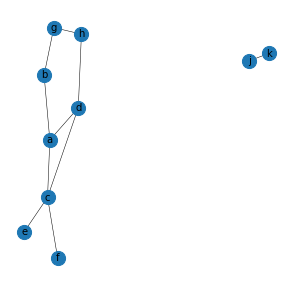

In [60]:
draw_graph(G_con)

In [61]:
#¿Están conectados G_weighted y G_con?
nx.is_connected(G_con)

False

In [62]:
# Mostramos los componentes con nx.connected_componentes()
nx.is_connected(G_karate)

True

#### Componente Gigante

In [63]:
sorted(nx.connected_components(G_con), key=len, reverse=True)[0]

{'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}

#### Conectividad Media

Media de la conectividad local de nodos promediada sobre el conjunto de todos los pares de nodos (nx.algorithms.connectivity.average_node_connectivity)

Calcular la de G2, G2 y G3

In [64]:
nx.algorithms.connectivity.average_node_connectivity(G_con)

1.0

#### Conectividad en Grafos Dirigidos

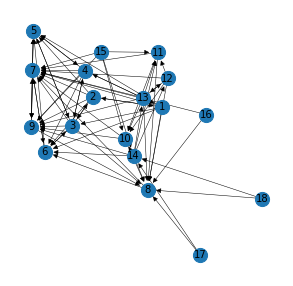

In [65]:
# Recordando nuestro grafo de K
draw_graph(G_directed)

Podemos obtener los componentes fuertemente conexos con el siguiente comando:

In [66]:
list(nx.strongly_connected_components(G_directed))

[{'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 {'10'},
 {'11'},
 {'12', '13'},
 {'14'},
 {'15'},
 {'16'},
 {'17'},
 {'18'}]

Podemos obtener los componentes debilmente conexos con el siguiente comando:

In [67]:
nx.number_weakly_connected_components(G_directed)

1

### 4. Robustez

#### Articulaciones

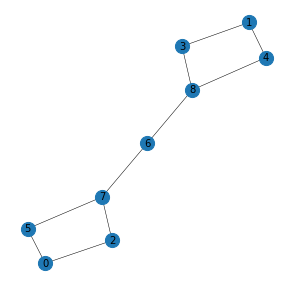

In [68]:
draw_graph(G4)

In [69]:
list(nx.articulation_points(G4))

[8, 6, 7]

#### Componentes Puente

A bridge is a direct tie between nodes that would otherwise be in disconnected components of the graph [Wikipedia]

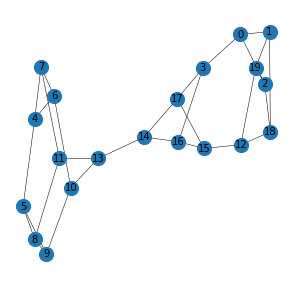

In [70]:
plt.figure(1,figsize=(5,5)) 

pos = nx.spring_layout(G1)  # positions for all nodes
plt.figure(1,figsize=(6,6)) 

# nodes
nx.draw_networkx_nodes(G1, pos, node_size=200)

#labels
nx.draw_networkx_labels(G1, pos, font_size=10, font_family='sans-serif')

# edges
nx.draw_networkx_edges(G1, pos, width=0.5)
plt.axis('off')
plt.show()

In [71]:
nx.algorithms.has_bridges(G1)

True

In [72]:
# Listamos los puentes (nx.bridges)
list(nx.bridges(G1))

[(13, 14)]

In [73]:
bcomps = list(nx.algorithms.connectivity.bridge_components(G1))
bcomps

[{0, 1, 2, 3, 12, 14, 15, 16, 17, 18, 19}, {4, 5, 6, 7, 8, 9, 10, 11, 13}]

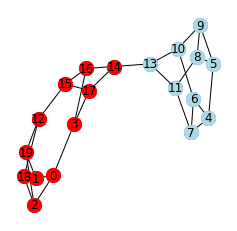

In [74]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
pos = nx.spring_layout(G1)
nx.draw(G1,pos=pos,ax=ax,with_labels=True, alpha=1,node_size=200)
nx.draw_networkx_nodes(G1,
                       nodelist=bcomps[0],
                       with_labels=True, 
                       font_weight='bold',
                       pos=pos,
                       node_color="r",
                       label=True,
                       node_size=200,
                       ax=ax)
nx.draw_networkx_nodes(G1,
                       nodelist=bcomps[1],
                       with_labels=True, 
                       font_weight='bold',
                       pos=pos,
                       node_color="lightblue",
                       node_size=200,
                       ax=ax)

#### Puentes Locales

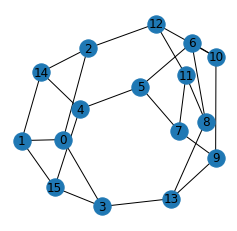

In [75]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
nx.draw(G3, with_labels=True,ax=ax)

In [76]:
nx.algorithms.has_bridges(G3)

False

In [77]:
list(nx.bridges(G3))

[]

In [78]:
nx.is_bipartite(G3)

False

En este caso, algunas uniones pueden parecer puentes, por lo que podemos mirar puentes locales.
Al calcular el *span*, se calcula la distancia más corta que une ambos extremos del puente, si se quita.

In [79]:
local_bridges = pd.DataFrame(nx.algorithms.local_bridges(G3, with_span=True),columns=(0,1,"span"))
print("Puentes locales encontrados",local_bridges.shape[0])
print("Puentes de mayor span")
local_bridges[local_bridges["span"] == local_bridges["span"].max()]

Puentes locales encontrados 24
Puentes de mayor span


,0,1,span
5,2,12,6
7,3,13,6
9,4,5,6


#### Minimum-cut (maximum flow)

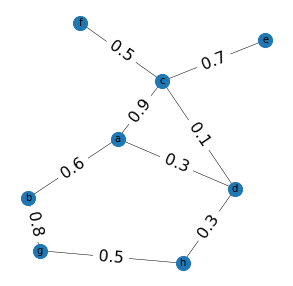

In [80]:
draw_graph(G_weighted, edge_label_att='weight')

In [81]:
# Minimum-cut entre nodos 'e' y 'h'
nx.algorithms.flow.minimum_cut(G_weighted,'e','h',capacity='weight')

(0.7, ({'e'}, {'a', 'b', 'c', 'd', 'f', 'g', 'h'}))

In [82]:
# Minimum-cut entre nodos 'c' y 'g'
nx.minimum_cut(G_weighted,'c','g',capacity='weight')

(0.8999999999999999, ({'a', 'c', 'd', 'e', 'f'}, {'b', 'g', 'h'}))

## Particionado de Grafos

### Cluster Jerárquico

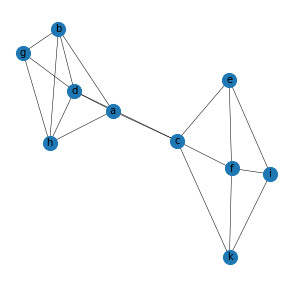

In [83]:
G_part = G_weighted.copy()
G_part.add_edge('e', 'i', weight=0.5)
G_part.add_edge('e', 'f', weight=0.5)
G_part.add_edge('i', 'f', weight=0.5)
G_part.add_edge('i', 'k', weight=0.5)
G_part.add_edge('f', 'k', weight=0.5)
G_part.add_edge('h', 'a', weight=0.5)
G_part.add_edge('b', 'd', weight=0.5)
G_part.add_edge('g', 'd', weight=0.5)
G_part.add_edge('b', 'h', weight=0.5)
G_part.add_edge('c', 'k', weight=0.5)
draw_graph(G_part)

In [84]:
list(nx.algorithms.community.asyn_fluidc(G_part, 3))

[{'b', 'g'}, {'a', 'd', 'h'}, {'c', 'e', 'f', 'i', 'k'}]

In [85]:
# Ahora intentamos dividir la red de karate en dos:
c = list(nx.algorithms.community.asyn_fluidc(G_karate, 2))

In [86]:
colours = []
for n in range(len(G_karate)):
    if n in c[0]:
        colours.append(0)
    else:
        colours.append(1)

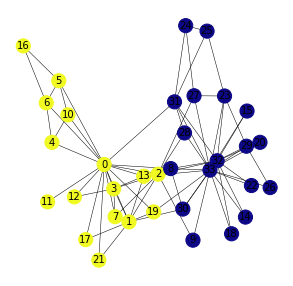

In [87]:
draw_graph(G_karate, node_color=colours)

### Clustering Espectral

In [88]:
# Calculamos la matriz Laplaciana y la pasamos a formato denso
L = nx.laplacian_matrix(G_karate).todense()

In [89]:
L

matrix([[16, -1, -1, ..., -1,  0,  0],
        [-1,  9, -1, ...,  0,  0,  0],
        [-1, -1, 10, ...,  0, -1,  0],
        ...,
        [-1,  0,  0, ...,  6, -1, -1],
        [ 0,  0, -1, ..., -1, 12, -1],
        [ 0,  0,  0, ..., -1, -1, 17]], dtype=int64)

In [90]:
eig_values, eig_vectors = np.linalg.eig(L)
print("Eigenvectors:\n", eig_vectors)
print("\nEigenvalues:\n", eig_values)

Eigenvectors:
 [[ 1.93749031e-01 -9.40932167e-01 -9.47825261e-02 ...  2.80012168e-16
  -1.51788593e-16 -3.59874800e-16]
 [ 5.22422164e-03  6.58647640e-02  9.91845054e-02 ... -2.90200411e-16
   6.49805979e-17  1.85023051e-16]
 [ 2.91860881e-02  1.15069117e-01 -3.14797911e-01 ...  6.78677757e-16
  -1.66689616e-16 -4.70932786e-16]
 ...
 [-8.55124031e-02  7.68509217e-02 -1.23027130e-01 ... -7.95131559e-17
   6.13457407e-17  1.22378461e-16]
 [-5.90752833e-02 -7.43433668e-02  8.89558873e-01 ... -1.15930243e-16
  -1.71642947e-16 -3.54583999e-17]
 [ 9.43479415e-01  2.01841425e-01  3.74802971e-02 ...  1.27853888e-16
  -8.36610216e-17 -1.82837862e-16]]

Eigenvalues:
 [1.81366960e+01 1.70551712e+01 1.33061223e+01 1.09210675e+01
 9.77724095e+00 6.99619703e+00 6.51554463e+00 6.33159222e+00
 6.84538602e-15 5.37859508e+00 4.68525227e-01 4.58079267e+00
 4.48000767e+00 4.27587682e+00 9.09247664e-01 1.12501072e+00
 1.25940411e+00 1.59928308e+00 1.76189862e+00 1.82605521e+00
 1.95505045e+00 2.48709173e+0

The number of components in a graph is directly related to the number of non-zero eigenvalues of the graph Laplacian.

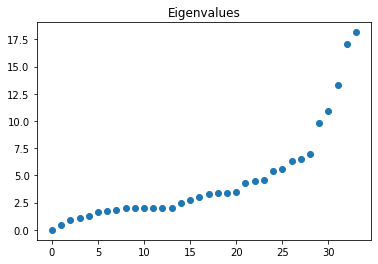

In [91]:
plt.figure()
plt.scatter(np.arange(len(eig_values)), sorted(eig_values))
plt.title("Eigenvalues")
plt.show()

In [92]:
index = 10

fiedler_vector = eig_vectors[index, :]
fiedler_vector = np.array(fiedler_vector)

In [93]:
print(fiedler_vector[0])

[-1.12534185e-02  5.82879065e-02  7.62221479e-03 -2.01979742e-03
 -3.85631689e-03 -4.25493195e-04  1.00147931e-02 -1.45381789e-04
 -1.71498585e-01  1.01334950e-02 -2.84604525e-01 -3.87563486e-03
  1.19717510e-03  2.62329410e-01  1.21266235e-01 -3.11305129e-02
 -3.74609297e-04  1.00258978e-02 -1.72772827e-02 -6.86622359e-02
  5.40899038e-01 -4.90321112e-02 -2.50144645e-02 -4.60308665e-03
  1.45939017e-02  6.28275218e-03 -1.69532795e-02 -3.71748034e-01
  5.49239640e-15 -6.01500955e-01 -2.13227724e-15  4.02911804e-15
 -1.94081281e-15 -4.77616260e-15]


/home/miguelangel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


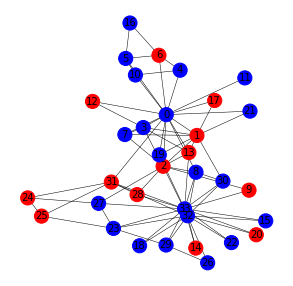

In [95]:
# Separamos los clusters en función del signo de cada nodo en este autovector
clusters = np.sign(fiedler_vector[0])

colours = ['red' if c == 1 else 'blue' for c in clusters]

draw_graph(G_karate, node_size=200, figsize=(5,5), 
           node_color=colours)

## Grafos k-partitos

https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html En este enlace se encuentra la documentación de la librería referente a este tipo de grafos.

Grafo bipartito es todo aquel cuyos vértices puedan ser particionados en dos subconjuntos, y cada enlace del grafo inicial une una partición con otra.

Además, no puede contener ciclos impares.

Construimos un grafo bipartito a partir de la red:

In [96]:
bipartite_graph = nx.algorithms.bipartite.random_graph(5,5,.6)
bipartite_graph.edges

EdgeView([(0, 6), (0, 7), (0, 8), (1, 5), (1, 6), (1, 7), (1, 9), (2, 6), (2, 7), (2, 9), (3, 5), (3, 7), (3, 8), (4, 8)])

El grafo está compuesto de dos particiones: set A tiene los nodos 0 a (n - 1) y set B los nodos de n a (n + m - 1)

The graph is composed of two partitions. Set A has nodes 0 to (n - 1) and set B has nodes n to (n + m - 1).

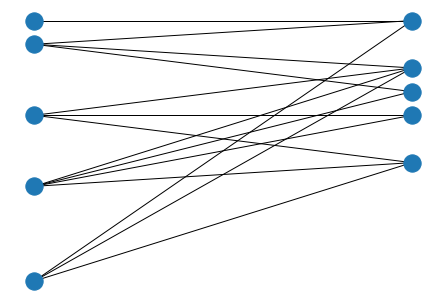

In [97]:
X = [x[0] for x in list(bipartite_graph.edges)]
Y = [x[1] for x in list(bipartite_graph.edges)]
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(bipartite_graph, pos=pos)
plt.show()

## Asortatividad

Mide la similitud del tipo de conexiones que tiene un nodo según los atributos del nodo. Es semejante a un tipo de correlación de enlaces.

Obteniendo la correlación de atributos entre nodos y cómo se conectan.

In [98]:
nx.set_node_attributes(G_karate, core_number, 'feature')

In [99]:
nx.algorithms.assortativity.attribute_assortativity_coefficient(G_karate,'feature')

0.09160630592245424

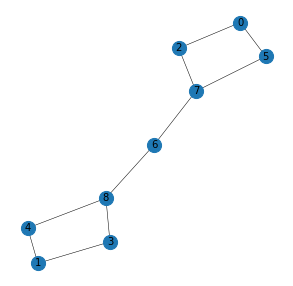

In [100]:
draw_graph(G4)

In [101]:
f = {0:1, 2:1, 5:1, 7:1, 6: 0.5, 8: -1, 4:-1, 3:-1, 1:-1}

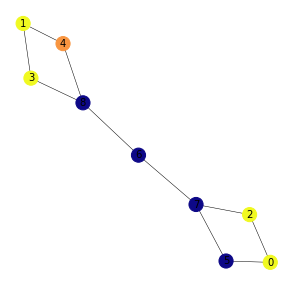

In [102]:
draw_graph(G4, node_color=f)

In [103]:
nx.set_node_attributes(G4, f, 'feature')

In [104]:
nx.algorithms.assortativity.attribute_assortativity_coefficient(G4, 'feature')

0.6581196581196582